In [260]:
import pandas as pd
data= pd.read_csv('data/wine_cleared.csv')
import statistics
data.head(2)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,...,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,...,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna
1,1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,...,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro


                           РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

✍️ Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

In [261]:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)

In [262]:
data.head(2)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,...,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,...,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna
1,1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,...,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro


                      РАЗБОР ТЕКСТА

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

Например, с помощью такого регулярного выражения [^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+ можно найти любой email в тексте.

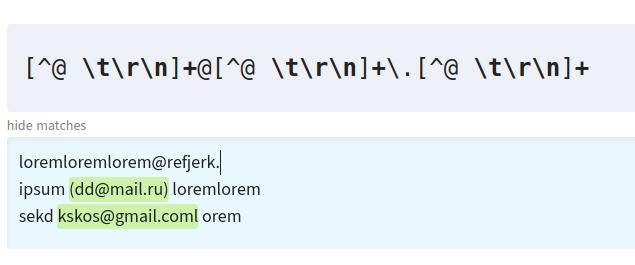

*Демонстрация работы регулярного выражения для поиска email в тексте.*

✍️ Выполните код для нахождения года вина при помощи регулярного выражения:

In [263]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

Разберём регулярное выражение \d{4}:
* \d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
* {4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.

Таким образом, \d{4} означает поиск четырехзначных чисел в заданной строке.

Однако при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.

Полученный признак year будет выглядеть следующим образом:

In [264]:
data.head(2)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,...,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,...,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0,Etna
1,1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,...,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro


Используя методы работы со строками pandas и регулярные выражения, можно извлечь любую информацию для новых признаков: даты, слова и выражения.

                                РАЗБОР КАТЕГОРИЙ

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [265]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data.head(3)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,...,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,...,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0,Etna
1,1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,...,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro
2,2,2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,...,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley


В наборе данных также есть ещё две страны, которые являются не менее популярными производителями вина.

Задание 2.1

Выберите из списка две самых популярных (помимо США) страны, производящих вино.
-Подсказка: Используйте data['country'].value_counts() для нахождения верного ответа.

In [266]:
data['country'].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


Возможно, производство вина в этих странах также влияет на рейтинг. Давайте создадим для них бинарные признаки.

Задание 2.2

Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.

In [267]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0) 
# ставим значение 1 там, где страна France
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0) 
# ставим значение 1 там, где страна Italy

В ответ впишите результат выполнения кода data['is_france'].sum():

In [268]:
data['is_france'].sum()

22093

В ответ впишите результат выполнения кода data['is_italy'].sum():

In [269]:
data['is_italy'].sum()

19540

Попробуем вывести правило в определении качества вина: старые вина лучше молодых. В нашем датасете 40 % вин старше 2010 года. 

Задание 2.3

Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.

В ответ впишите результат выполнения кода data['old_wine'].sum():

In [270]:
# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')
# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()

39765

Задание 2.5

Проектирование признаков включает в себя… Выберите все верные варианты:
- создание признаков
- преобразование признаков
- отбор признаков

Задание 2.6

Сопоставьте этапы создания признаков и используемые приёмы.

извлечение бинарного признака для значения категории  - разбор категорий

использование логарифмирования, округления - разбор числовых значений
 
извлечение количества дней из разницы дат - разбор даты и времени
 
использование регулярных выражений - разбор текста

работа со строковыми методами pandas - разбор текста

Задание 2.7 (Самопроверка)

Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

Ответом на это задание является получившееся регулярное выражение и код преобразования.

In [271]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)

In [272]:
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(['Unnamed: 0.1'], axis=1)

In [274]:
data.to_csv('data/wine_cleared.csv')